In [107]:
# importing libraries
from langdetect import detect#supports around 55 language
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## Sentiment Analysis

In [2]:
#reading the dataset
data = pd.read_csv('dataset_es_train.csv')
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [3]:
#checking the shape of dataset
data.shape

(200000, 8)

In [24]:
#selecting 100 rows
sample = data.sample(100)
sample.reset_index(drop=True, inplace=True)

In [25]:
sample

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0723062,product_es_0263903,reviewer_es_0663021,4,"Muy útil, hace muy bien su función",Útil,es,baby_product
1,es_0712308,product_es_0321142,reviewer_es_0343224,5,Tanaño perfecto. Calidad muy alta.,Perfecta,es,sports
2,es_0924748,product_es_0278685,reviewer_es_0447927,3,Muy poca potencia. se queda corta de todas tod...,mas o menos,es,home_improvement
3,es_0479314,product_es_0630338,reviewer_es_0701833,5,"Preciosas, me han gustado mucho, me las compre...",Buena compra,es,furniture
4,es_0793824,product_es_0911642,reviewer_es_0609113,4,"buen reloj ya tenia un casio antes , y me fue ...",la marca no defrauda,es,watch
...,...,...,...,...,...,...,...,...
95,es_0940093,product_es_0992760,reviewer_es_0865599,3,"El tamaño es enorme, pero las cintas que trae ...",Cumple pero a medias,es,toy
96,es_0620436,product_es_0368035,reviewer_es_0455000,3,"Venía empaquetada en una caja blanca, poco atr...","Funciona bien, venía torcida",es,home
97,es_0345920,product_es_0125805,reviewer_es_0659848,4,"Montado y bien, realiza la función para la que...",Satisfecho con la compra en general,es,lawn_and_garden
98,es_0507255,product_es_0240694,reviewer_es_0775089,1,Recibido ayer y NO ES ORIGINAL COMO DICE. No f...,NO ES ORIGINAL,es,electronics


In [26]:
#making a dataframe of review and stars
df = sample[['review_body','stars']]

In [27]:
#checking the languages of reviews
def lang_detect(data):
    lang = detect(data)
    return lang

In [28]:
#returns the language code
print(df.review_body[0])
lang_detect(df.review_body[0])

Muy útil, hace muy bien su función


'es'

In [29]:
df['language'] = df.review_body.apply(lang_detect)

In [30]:
df

,review_body,stars,language
0,"Muy útil, hace muy bien su función",4,es
1,Tanaño perfecto. Calidad muy alta.,5,es
2,Muy poca potencia. se queda corta de todas tod...,3,es
3,"Preciosas, me han gustado mucho, me las compre...",5,es
4,"buen reloj ya tenia un casio antes , y me fue ...",4,es
...,...,...,...
95,"El tamaño es enorme, pero las cintas que trae ...",3,es
96,"Venía empaquetada en una caja blanca, poco atr...",3,es
97,"Montado y bien, realiza la función para la que...",4,es
98,Recibido ayer y NO ES ORIGINAL COMO DICE. No f...,1,es


In [31]:
#returns the unique languages of reviews
df.language.unique()

array(['es', 'de', 'pt'], dtype=object)

In [32]:
df.language.value_counts()

es    98
de     1
pt     1
Name: language, dtype: int64

In [33]:
#translating the review to english
def lang_trans(data):
    translor = Translator()
    translated_text = translor.translate(data)
    return translated_text.text

In [34]:
print(df.review_body[0])
lang_trans(df.review_body[0])

Muy útil, hace muy bien su función


'Very useful, its function does very well'

In [35]:
df['translated_reviews'] = df.review_body.apply(lang_trans)

In [36]:
# performing the exploratory data analysis
def ngram_extractor(data,ngram_range):
    tokens = word_tokenize(data)
    ngram = ngrams(tokens,ngram_range)
    ngram_list1 = []
    for ngram1 in ngram:
        ngram_list1.append(' '.join(ngram1))
    return ngram_list1
list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))

final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
    
cnt = Counter(final_unigram).most_common(25)#frequent unigrams

In [37]:
cnt

[(',', 144),
 ('the', 144),
 ('it', 101),
 ('is', 90),
 ('and', 87),
 ('to', 72),
 ('I', 71),
 ('not', 59),
 ('.', 58),
 ('a', 55),
 ('very', 44),
 ('that', 42),
 ('of', 41),
 ('but', 35),
 ('have', 34),
 ('are', 30),
 ('for', 28),
 ('they', 28),
 ('in', 28),
 ('with', 25),
 ('good', 23),
 ('quality', 22),
 ('The', 21),
 ('has', 19),
 ('does', 17)]

In [38]:
# preprocessing the data
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')#to maintain negative review as negative reviews 
def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

In [39]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [40]:
clean_text

0                              [useful, function, well]
1                    [perfect, sizevery, high, quality]
2     [little, falls, short, small, pieces, okay, so...
3     [beautiful, liked, lot, bought, next, table, d...
4     [good, watch, casio, well, reason, bought, ano...
                            ...                        
95    [size, huge, tapes, brings, tie, short, solved...
96    [packaged, white, box, unattractive, central, ...
97    [mounted, well, perform, function, bought, not...
98    [received, yesterday, not, original, fast, cha...
99    [robust, buttons, used, perfectly, electric, c...
Name: translated_reviews, Length: 100, dtype: object

In [41]:
#getting the list of unigrams
list_unigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),1))

final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
    
cnt = Counter(final_unigram).most_common(25)
cnt

[('not', 69),
 ('good', 24),
 ('quality', 23),
 ('well', 18),
 ('one', 13),
 ('time', 13),
 ('price', 11),
 ('bought', 10),
 ('product', 10),
 ('use', 10),
 ('without', 10),
 ('would', 9),
 ('function', 8),
 ('small', 8),
 ('recommend', 8),
 ('fine', 7),
 ('arrived', 7),
 ('size', 7),
 ('put', 7),
 ('bad', 7),
 ('short', 6),
 ('something', 6),
 ('liked', 6),
 ('work', 6),
 ('like', 6)]

In [42]:
#getting the list of trigrams
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))

final_trigram = []
for trigram in list_trigrams:
    final_trigram.extend(trigram)
    
cnt = Counter(final_trigram).most_common(25)
cnt

[('tea tree oil', 2),
 ('useful function well', 1),
 ('perfect sizevery high', 1),
 ('sizevery high quality', 1),
 ('little falls short', 1),
 ('falls short small', 1),
 ('short small pieces', 1),
 ('small pieces okay', 1),
 ('pieces okay something', 1),
 ('okay something big', 1),
 ('something big mmmm', 1),
 ('big mmmm not', 1),
 ('mmmm not stops', 1),
 ('not stops minimum', 1),
 ('stops minimum pressure', 1),
 ('beautiful liked lot', 1),
 ('liked lot bought', 1),
 ('lot bought next', 1),
 ('bought next table', 1),
 ('next table delighted', 1),
 ('good watch casio', 1),
 ('watch casio well', 1),
 ('casio well reason', 1),
 ('well reason bought', 1),
 ('reason bought another', 1)]

In [43]:
test = df[(df.stars<3)].reset_index(drop=True)
test

,review_body,stars,language,translated_reviews
0,Pues dos aceites no son lo que dicen. Yo sé ex...,2,es,"Well, two oils are not what they say.I know ex..."
1,El soporte trasero viene soldado desnivelado s...,2,es,The rear support comes slope soldier is seen o...
2,Está buena de sabor pero muy muy seca,2,es,It is good with flavor but very dry
3,Al igual que a la no escasa mayoría de los que...,1,es,Like the uncassed majority of those who have v...
4,Lo compré como regalo en una rebaja a 40€ y ho...,1,es,I bought it as a gift in a reduction at € 40 a...
5,despues de funcionar correctamente durante una...,2,es,"After working properly for a week, I stopped w..."
6,"No es de tamaño universal, la manguera es más ...",1,es,"It is not universal, the hose is shorter than ..."
7,Es de muy mala calidad de la calor se le a des...,1,es,"It is very poor quality of the heat, the scree..."
8,No me ha durado ni un mes . La comba va rápida...,2,es,It hasn't lasted for a month.The commba goes f...
9,No cubre la curva como dicen .Para mi engañoso...,1,es,It does not cover the curve as they say. For m...


In [44]:
clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))

final_trigram = []
for trigram in list_trigrams:
    final_trigram.extend(trigram)
    
cnt = Counter(final_trigram).most_common(25)
cnt

[('tea tree oil', 2),
 ('well two oils', 1),
 ('two oils not', 1),
 ('oils not know', 1),
 ('not know exactly', 1),
 ('know exactly tea', 1),
 ('exactly tea tree', 1),
 ('tree oil smells', 1),
 ('oil smells already', 1),
 ('smells already not', 1),
 ('already not smell', 1),
 ('not smell tea', 1),
 ('smell tea tree', 1),
 ('tree oil two', 1),
 ('oil two something', 1),
 ('two something flower', 1),
 ('something flower something', 1),
 ('flower something not', 1),
 ('something not others', 1),
 ('not others fine', 1),
 ('others fine oil', 1),
 ('fine oil comes', 1),
 ('oil comes faster', 1),
 ('comes faster others', 1),
 ('faster others bought', 1)]

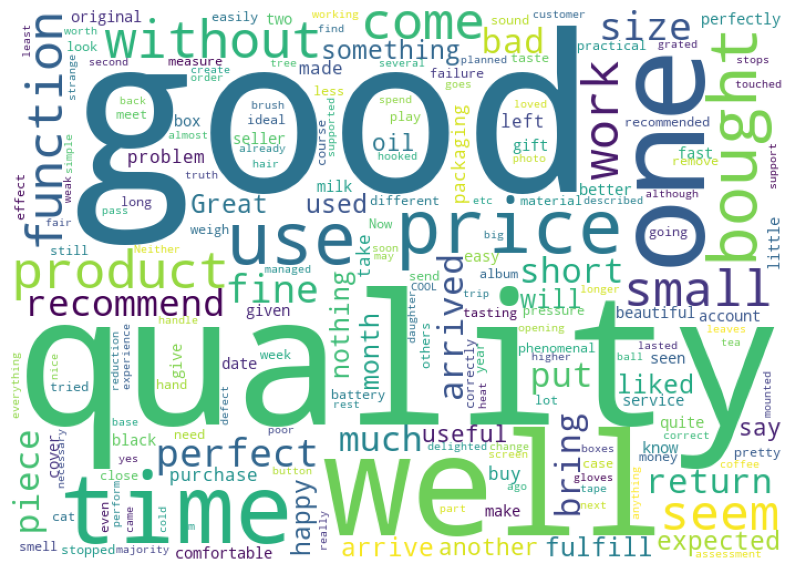

In [45]:
#creating the wordcloud
def wordcloud(data,column):
    df_ = data[column].str.cat(sep = ' ')
    text = ' '.join([word for word in df_.split()])
    wordcloud = WordCloud(width = 700, height = 500, background_color='white').generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
wordcloud(df,'translated_reviews')

In [46]:
#extracting the keywords using yake
def yake_extractor(data):
    key_extractor = yake.KeywordExtractor()
    keywords = key_extractor.extract_keywords(data)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list
keywords = df.translated_reviews.apply(yake_extractor)
all_keywords = []
for kw in keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(1000)
cnt

[('good', 22),
 ('quality', 20),
 ('product', 9),
 ('time', 9),
 ('bought', 8),
 ('price', 8),
 ('small', 7),
 ('function', 6),
 ('arrived', 6),
 ('size', 6),
 ('good quality', 6),
 ('short', 5),
 ('fine', 5),
 ('purchase', 5),
 ('happy', 5),
 ('put', 5),
 ('bad', 5),
 ('return', 5),
 ('made', 5),
 ('work', 4),
 ('expected', 4),
 ('fast', 4),
 ('arrive', 4),
 ('comfortable', 3),
 ('ideal', 3),
 ('gift', 3),
 ('sound', 3),
 ('left', 3),
 ('stopped', 3),
 ('make', 3),
 ('works', 3),
 ('beautiful', 3),
 ('buy', 3),
 ('black', 3),
 ('material', 3),
 ('money', 3),
 ('perfectly', 3),
 ('seller', 3),
 ('perfect', 3),
 ('easy', 3),
 ('original', 3),
 ('month', 3),
 ('remove', 3),
 ('big', 2),
 ('pieces', 2),
 ('pressure', 2),
 ('stops', 2),
 ('lot', 2),
 ('delighted', 2),
 ('poor quality', 2),
 ('support', 2),
 ('poor', 2),
 ('touched', 2),
 ('change', 2),
 ('nice', 2),
 ('months', 2),
 ('majority', 2),
 ('opening', 2),
 ('managed', 2),
 ('measures', 2),
 ('service', 2),
 ('week', 2),
 ('failu

In [47]:
keywords

0                                            [function]
1     [Perfect sizeVery high, sizeVery high quality,...
2     [power.It falls short, all.For small pieces, p...
3            [Beautiful, lot, delighted, bought, table]
4     [Good watch, Good, reason, watch, casio, bough...
                            ...                        
95    [play poker haha, cardboard tube.He fulfills, ...
96    [white box, it.For the rest, proper functionin...
97    [satisfied in general, perform the function, g...
98    [says.The fast charging, Received yesterday, s...
99    [robust cover.The buttons, electric charge cab...
Name: translated_reviews, Length: 100, dtype: object

In [48]:
#extracting the keywords using rakw
def rake_extractor(data):
    keyword_extractor = Rake()
    keyword_extractor.extract_keywords_from_text(data)
    return keyword_extractor.get_ranked_phrases()
rake_keywords = df.translated_reviews.apply(rake_extractor)
all_keywords = []
for kw in rake_keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(100)
cnt

[('well', 11),
 ('use', 9),
 ('function', 8),
 ('bought', 8),
 ('product', 8),
 ('fine', 8),
 ('good', 8),
 ('liked', 6),
 ('expected', 6),
 ('like', 6),
 ('one', 6),
 ('good quality', 6),
 ('nothing', 6),
 ('price', 6),
 ('arrive', 5),
 ('arrived', 5),
 ('purchase', 5),
 ('quality', 5),
 ('perfect', 5),
 ('recommend', 5),
 ('put', 5),
 ('return', 5),
 ('made', 5),
 ('say', 4),
 ('seen', 4),
 ('comfortable', 4),
 ('size', 4),
 ('gift', 4),
 ('seem', 4),
 ('given', 4),
 ('would', 4),
 ('happy', 4),
 ('buy', 4),
 ('bad', 4),
 ('useful', 3),
 ('lot', 3),
 ('beautiful', 3),
 ('work', 3),
 ('something', 3),
 ('others', 3),
 ('time', 3),
 ('come', 3),
 ('course', 3),
 ('used', 3),
 ('practical', 3),
 ('make', 3),
 ('fulfills', 3),
 ('also', 3),
 ('month', 3),
 ('small', 3),
 ('close', 3),
 ('case', 3),
 ('tried', 3),
 ('hand', 3),
 ('know', 3),
 ('bring', 3),
 ('remove', 3),
 ('stops', 2),
 ('delighted', 2),
 ('send', 2),
 ('box', 2),
 ('already', 2),
 ('poor quality', 2),
 ('touched', 2),
 

In [49]:
rake_keywords

0                              [well, useful, function]
1                       [perfect sizevery high quality]
2     [something big ..... mmmm, small pieces okay, ...
3     [table, next, lot, liked, delighted, bought, b...
4     [bought another one, good watch, work, well, w...
                            ...                        
95    [play poker haha, pieces get hooked, one canno...
96    [white box, proper functioning, central tube, ...
97    [good material, well, strong, satisfied, perfo...
98    [received yesterday, fast charging, bad assess...
99    [electric charge cable, connected without prob...
Name: translated_reviews, Length: 100, dtype: object

In [50]:
# preprocessing the data
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning 
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5.autocorrect 
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [51]:
clean_text_train = df.translated_reviews.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)

In [52]:
clean_text_train

0                                  useful function well
1                         perfect sizevery high quality
2     little fall short small piece okay something b...
3       beautiful liked lot bought next table delighted
4     good watch casio well reason bought another on...
                            ...                        
95    size huge tape brings tie short solved elastic...
96    packaged white box unattractive central tube c...
97    mounted well perform function bought not made ...
98    received yesterday not original fast charging ...
99    robust button used perfectly electric charge c...
Name: translated_reviews, Length: 100, dtype: object

In [53]:
#creating the text vectorization using count vectoriser
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text_train).A
pd.DataFrame(bow, columns=count_vect.get_feature_names())


,able,according,account,act,adapts,adhesion,administration,advisable,aesthetic,ago,...,work,worked,working,worse,worth,would,wrong,year,yes,yesterday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [54]:
#creating the text vectorization using tfidf
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train).A
pd.DataFrame(tfidf, columns=tfidf_vect.get_feature_names())

,able,according,account,act,adapts,adhesion,administration,advisable,aesthetic,ago,...,work,worked,working,worse,worth,would,wrong,year,yes,yesterday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.270704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.241915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348372


In [55]:
sent = clean_text_train.tolist()
splitted_sent = [sen.split() for sen in sent]
print(splitted_sent)

[['useful', 'function', 'well'], ['perfect', 'sizevery', 'high', 'quality'], ['little', 'fall', 'short', 'small', 'piece', 'okay', 'something', 'big', 'mmmm', 'not', 'stop', 'minimum', 'pressure'], ['beautiful', 'liked', 'lot', 'bought', 'next', 'table', 'delighted'], ['good', 'watch', 'casio', 'well', 'reason', 'bought', 'another', 'one', 'work', 'well'], ['product', 'fine', 'expected'], ['well', 'two', 'oil', 'not', 'know', 'exactly', 'tea', 'tree', 'oil', 'smell', 'already', 'not', 'smell', 'tea', 'tree', 'oil', 'two', 'something', 'flower', 'something', 'not', 'others', 'fine', 'oil', 'come', 'faster', 'others', 'bought', 'use', 'box', 'fine', 'oil', 'not', 'create', 'send', 'false', 'dangerous', 'allergy'], ['rear', 'support', 'come', 'slope', 'soldier', 'seen', 'poor', 'quality', 'opinion', 'inago', 'touched', 'change', 'soon'], ['arrived', 'promptly', 'comfortable', 'effective', 'pilate', 'class'], ['monkey', 'small', 'size', 'ideal', 'pitidito', 'press', 'arrived', 'time', 'gre

In [56]:
#creating the text vectorization using word2vec

word_2vec_model = Word2Vec(splitted_sent,min_count=2,window=3)


In [59]:
word_2vec_model.save('word2vec.model')

In [60]:
def vectorizer(list_of_docs,model):
    feature = []#to save vector of reviews
    for rew in list_of_docs:
        zero_vector = np.zeros(model.vector_size)#if word2vec didn't make vector of any word
        vectors = []#to save vector of words
        for word in rew:
            if word in model.wv:
                try:
                    vectors.append(model.wv[word])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
    return feature

In [61]:
#creating the doc2vec
vectorized_docs = vectorizer(splitted_sent,word_2vec_model)

In [62]:
vectorized_docs

[array([-8.0712559e-04, -1.3052290e-03, -5.8370486e-05, -3.1590092e-04,
         2.3495129e-03, -3.0073754e-03,  1.0625216e-03,  8.1675304e-03,
         1.4506343e-04, -5.7139196e-03,  4.6816529e-04,  1.0638224e-03,
        -4.5051156e-03,  4.2622047e-03, -3.7594451e-04,  3.0020440e-03,
        -6.5591745e-04, -4.0141842e-03, -2.4676919e-03,  8.7171170e-04,
         1.0247756e-03,  1.1132768e-03,  4.8278435e-03,  6.0993806e-03,
        -8.2005450e-04,  2.7303568e-03,  6.7861732e-03, -4.0507121e-03,
        -1.6992758e-03,  2.8752964e-03,  3.2077802e-03, -5.4412787e-03,
        -2.3152917e-03, -6.4120553e-03,  1.4644014e-03,  6.7246598e-03,
         2.3873933e-03, -1.3733126e-03, -3.9488706e-03, -1.5091024e-03,
        -2.4807153e-03, -1.7877294e-03, -1.0078634e-03,  2.3297179e-03,
         8.0003897e-03,  2.3108069e-03, -2.4214953e-03, -1.8504504e-03,
        -3.4237406e-04,  2.9932833e-04, -7.9347036e-04,  6.1800919e-04,
        -4.8406976e-03, -4.4771512e-03, -5.6849298e-04,  1.94416

In [63]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-8.07125587e-04, -1.30522903e-03, -5.83704859e-05, ...,
        -6.01638854e-03, -8.78580249e-05, -1.17797649e-03],
       [ 2.65455502e-03,  6.51593134e-03, -7.05231121e-03, ...,
         4.33163438e-03,  3.80149949e-03, -4.16146265e-03],
       [ 1.96601541e-04,  2.07292935e-04, -7.43549463e-05, ...,
        -2.76355329e-03,  2.21459102e-03,  2.44486821e-03],
       ...,
       [-2.15109601e-03, -1.15213846e-03,  5.05000912e-03, ...,
        -1.98513269e-03, -5.74554666e-04, -8.06353171e-04],
       [-7.25991093e-04,  4.86715510e-03,  1.06541486e-03, ...,
        -8.67452531e-04, -3.03677050e-03,  1.37680187e-03],
       [-3.25153931e-03, -6.08520641e-04, -2.13289706e-04, ...,
         4.75714260e-05,  1.55691186e-03,  2.03600875e-03]])

In [64]:
#creating the target column using k-means
def build_kmeans(clusters,data):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [65]:
# kmeans -count-vectorizer
kmeans_model_count,count_pred = build_kmeans(3,bow)

In [66]:
count_pred

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2])

In [67]:
# kmeans-tfidf
kmeans_model_tfidf,tfidf_pred = build_kmeans(3,tfidf)

In [68]:
tfidf_pred

array([0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0,
       2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2,
       0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1])

In [69]:
# kmeans-word2vec
kmeans_model_word2vec,word2vec_pred= build_kmeans(3,x_emb)

In [70]:
word2vec_pred

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2])

In [71]:
# evaluation of clusters
print(f"Silhouette score with kmeans-count : {silhouette_score(bow,count_pred)}")
print(f"Silhouette score with kmeans-tfidf : {silhouette_score(tfidf,tfidf_pred)}")
print(f"Silhouette score with kmeans-word2vec : {silhouette_score(x_emb,word2vec_pred)}")


    

Silhouette score with kmeans-count : 0.20897490432673002
Silhouette score with kmeans-tfidf : 0.007434575553338036
Silhouette score with kmeans-word2vec : 0.1280916662298496


In [72]:
def visulize_silhouette(data,model,title1):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(data)
    plt.title(f"Silhouette visualizer for {title1}")

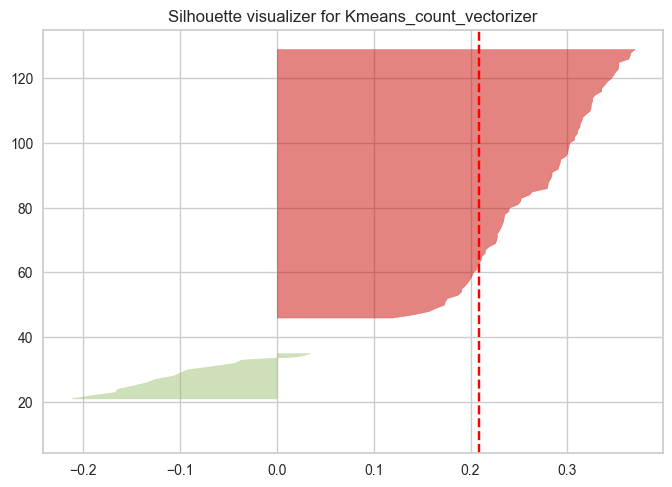

In [73]:
# kmeans-count
visulize_silhouette(bow,kmeans_model_count,'Kmeans_count_vectorizer')

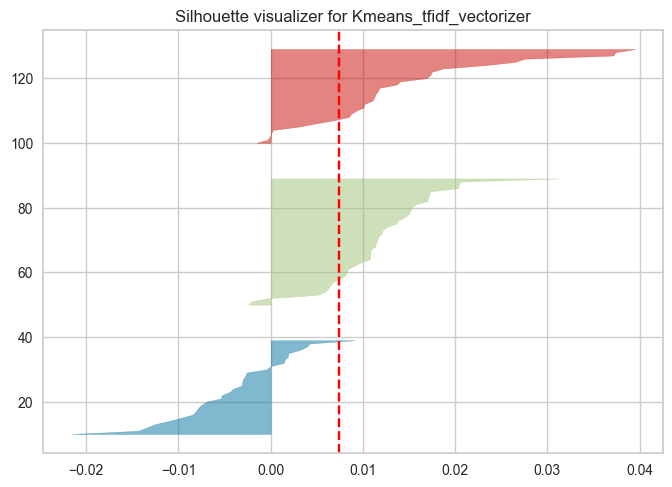

In [74]:
# kmeans-tfidf
visulize_silhouette(tfidf,kmeans_model_tfidf,'Kmeans_tfidf_vectorizer')

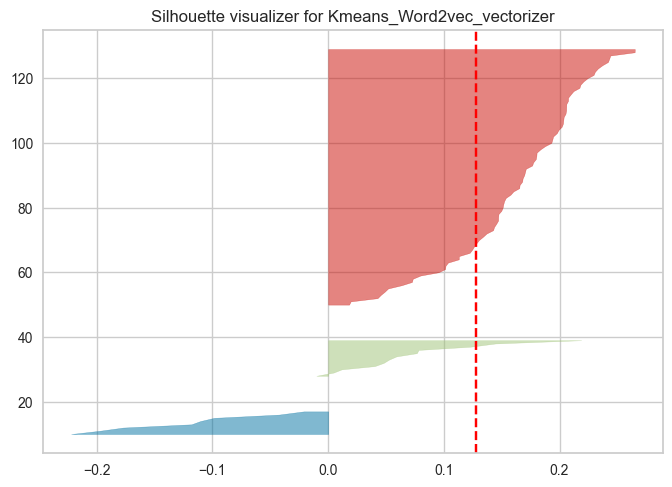

In [75]:
# kmeans-word2vec
visulize_silhouette(x_emb,kmeans_model_word2vec,'Kmeans_Word2vec_vectorizer')

In [76]:
data


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy


In [81]:
df["translated_reviews"]

0              Very useful, its function does very well
1                        Perfect sizeVery high quality.
2     Very little power.It falls short of all.For sm...
3     Beautiful, I liked them a lot, I bought them n...
4     Good watch I had a casio before, and it did ve...
                            ...                        
95    The size is huge, but the tapes it brings to t...
96    It was packaged in a white box, unattractive i...
97    Mounted and well, perform the function for whi...
98    Received yesterday and is not original as he s...
99    Very robust cover.The buttons can be used perf...
Name: translated_reviews, Length: 100, dtype: object

In [83]:
target = pd.Series(count_pred)

In [84]:
target

0     2
1     2
2     2
3     2
4     2
     ..
95    1
96    2
97    1
98    1
99    2
Length: 100, dtype: int32

In [97]:
df["Target"] = target
final_df = df[["translated_reviews","Target"]]
final_df

,translated_reviews,Target
0,"Very useful, its function does very well",2
1,Perfect sizeVery high quality.,2
2,Very little power.It falls short of all.For sm...,2
3,"Beautiful, I liked them a lot, I bought them n...",2
4,"Good watch I had a casio before, and it did ve...",2
...,...,...
95,"The size is huge, but the tapes it brings to t...",1
96,"It was packaged in a white box, unattractive i...",2
97,"Mounted and well, perform the function for whi...",1
98,Received yesterday and is not original as he s...,1


In [99]:
#splitting the dataset into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df.translated_reviews, final_df.Target, test_size=0.25,random_state=42)

In [126]:
x_train

15    Quality is good but they are smaller than they...
40    The size m that is the smallest and would be t...
96    It was packaged in a white box, unattractive i...
9     They are very monkeys for small puppies.The si...
72    I loved this book has made me grow in all area...
                            ...                        
60    He arrived at the planned dates.Small - medium...
71                   It works well but spoils very fast
14    One of the pedals does not work well and loses...
92    The cat has a little time to this toy !!!super...
51                  Very cool and of very good quality.
Name: translated_reviews, Length: 75, dtype: object

In [127]:
# count_vectorizer
count = CountVectorizer(max_df=0.95)
count_val_train = count.fit_transform(x_train)
count_val_test = count.transform(x_test)

In [128]:
count_val_train

<75x673 sparse matrix of type '<class 'numpy.int64'>'
	with 1630 stored elements in Compressed Sparse Row format>

In [129]:
count_val_train # .A or  toarray() have to convert sparse matrix into array
#sparse matrix is a matrix in which many or most of the elements have zero value

<75x673 sparse matrix of type '<class 'numpy.int64'>'
	with 1630 stored elements in Compressed Sparse Row format>

In [130]:
pd.DataFrame(count_val_train.A,columns = count.get_feature_names())

,10,100,16,19,40,according,account,accounts,act,adapts,...,working,works,worth,would,years,yeast,yes,yesterday,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
#checking the model accuracy with the count vectoriser
count_mnb = MultinomialNB()
count_mnb.fit(count_val_train.A,y_train)
predict_count = count_mnb.predict(count_val_test.A)
accuracy_count = accuracy_score(y_test,predict_count)*100
accuracy_count

84.0

In [132]:
# tfidf 
tfidf = TfidfVectorizer(max_df=0.95)
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [133]:
tfidf_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15480218, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [134]:
tfidf_train.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15480218, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [135]:
pd.DataFrame(tfidf_train.A, columns = tfidf.get_feature_names())

,10,100,16,19,40,according,account,accounts,act,adapts,...,working,works,worth,would,years,yeast,yes,yesterday,you,your
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.154802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.141268,0.124216,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.174573,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
71,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.475287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
72,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
73,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [136]:
#checking the model accuracy with the tfidf
tfidf_mnb = MultinomialNB()
tfidf_mnb.fit(tfidf_train.A,y_train)
predict_tfidf = tfidf_mnb.predict(tfidf_test.A)
accuracy_tfidf = accuracy_score(y_test,predict_tfidf)*100
accuracy_tfidf

84.0

## Root Cause Analysis

In [156]:
#creating dataframe of negative reviews
rc_df = final_df[final_df["Target"]==1]
rc_df

,translated_reviews,Target
6,"Well, two oils are not what they say.I know ex...",1
14,One of the pedals does not work well and loses...,1
24,"The gloves well, although by putting one of th...",1
40,The size m that is the smallest and would be t...,1
42,I bought it thinking that it was going to be b...,1
49,They do not give much lighting but they are no...,1
50,"Unfortunately, it came with a manufacturing de...",1
52,"The oars are fine to ""play"" with your ship.The...",1
55,The box and all good !!It was the first time t...,1
80,In less than a month of use there is already a...,1


In [157]:
from numpy.linalg import norm

In [158]:
def cosine_distance(vect1,vect2):
    distance = (np.dot(vect1,vect2))/(norm(vect1)*norm(vect2))
    return distance

In [160]:
def yake_extractor(data):
    key_extractor = yake.KeywordExtractor()
    keywords = key_extractor.extract_keywords(data)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list
keywords = rc_df.translated_reviews.apply(yake_extractor)
all_keywords = []
for kw in keywords:
    all_keywords.extend(kw)

In [162]:
all_keywords

['tea tree oil',
 'tree oil effect.Neither',
 'tree oil smells',
 'oil effect.Neither Vanilla.The',
 'tea tree',
 'tree oil',
 'effect.Neither Vanilla.The',
 'necessary.The box',
 'false label.That',
 'oil effect.Neither',
 'oil smells',
 'box is fine',
 'tree',
 'tea',
 'oil',
 'fine',
 'bought',
 'allergy',
 'oils',
 'say.I',
 'loses the sound',
 'sound frequently.It',
 'frequently.It is comfortable',
 'comfortable to fold',
 'managed to work',
 'work',
 'pedals',
 'loses',
 'sound',
 'frequently.It',
 'comfortable',
 'fold',
 'saved.But',
 'managed',
 'desoided immediately',
 'haired cats',
 'needles and thread',
 'easily fix.As',
 'short hair.Surely',
 'dogs.The rulo',
 'cats are short',
 'cats',
 'immediately',
 'usefulness',
 'long',
 'haired',
 'gloves',
 'putting',
 'desoided',
 'needles',
 'thread',
 'easily',
 'fix.As',
 'find',
 'price is complicated',
 'company managed',
 'managed very positively.The',
 'positively.The gloves',
 'woman',
 'palm',
 'complicated',
 'good',
 '

In [163]:
final_keyphrases = [kw for kw in all_keywords if (len(kw.split())>1)]#removing single words

In [164]:
final_keyphrases

['tea tree oil',
 'tree oil effect.Neither',
 'tree oil smells',
 'oil effect.Neither Vanilla.The',
 'tea tree',
 'tree oil',
 'effect.Neither Vanilla.The',
 'necessary.The box',
 'false label.That',
 'oil effect.Neither',
 'oil smells',
 'box is fine',
 'loses the sound',
 'sound frequently.It',
 'frequently.It is comfortable',
 'comfortable to fold',
 'managed to work',
 'desoided immediately',
 'haired cats',
 'needles and thread',
 'easily fix.As',
 'short hair.Surely',
 'dogs.The rulo',
 'cats are short',
 'price is complicated',
 'company managed',
 'managed very positively.The',
 'positively.The gloves',
 'sufficiently exquisite taste',
 'bought it thinking',
 'wrong or simple',
 'sufficiently exquisite',
 'recommend it.Of',
 'packaging is fine',
 'it.The taste',
 'exquisite taste',
 'toast date',
 'date of purchase',
 'give much lighting',
 'brush andThey worked',
 'work correctly',
 'noise and stops',
 'price marks',
 'transport service',
 'manufacturing defect',
 'makes a str

In [165]:
def vectorizer(list_of_docs,model):
    feature = []
    for rew in list_of_docs:
        tokens = rew.split() #####
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in tokens: ####
            if word in model.wv:
                try:
                    vectors.append(model.wv[word])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
    return feature

In [166]:
dict1 = {}
for index,kw in enumerate(final_keyphrases):
    for kw2 in final_keyphrases:
        vect1,vect2 = vectorizer([kw,kw2],word_2vec_model)
        distance = cosine_distance(vect1,vect2)
        if distance > 0.80:
            dict1[index] = [kw,kw2]

In [167]:
dict1

{0: ['tea tree oil', 'tree oil'],
 1: ['tree oil effect.Neither', 'tree oil'],
 2: ['tree oil smells', 'tree oil'],
 3: ['oil effect.Neither Vanilla.The', 'oil smells'],
 4: ['tea tree', 'tea tree'],
 5: ['tree oil', 'tree oil'],
 7: ['necessary.The box', 'necessary.The box'],
 9: ['oil effect.Neither', 'oil smells'],
 10: ['oil smells', 'oil smells'],
 11: ['box is fine', 'box is fine'],
 12: ['loses the sound', 'sound frequently.It'],
 13: ['sound frequently.It', 'sound frequently.It'],
 14: ['frequently.It is comfortable', 'comfortable to fold'],
 15: ['comfortable to fold', 'comfortable to fold'],
 16: ['managed to work', 'managed to work'],
 20: ['easily fix.As', 'easily mounted.Now'],
 21: ['short hair.Surely', 'cats are short'],
 23: ['cats are short', 'cats are short'],
 24: ['price is complicated', 'price marks'],
 25: ['company managed', 'managed very positively.The'],
 26: ['managed very positively.The', 'managed very positively.The'],
 28: ['sufficiently exquisite taste', '